<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/AbaloneAge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal is to identify the age of an abalone with:     'Shucked weight': 0.5123,
          'Whole weight': 1.1524,
   


In [227]:
pip install ucimlrepo

In [228]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [229]:
import pandas as pd
import numpy as np
import math

In [230]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [231]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rings   4177 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


In [232]:
df= pd.concat([X,y], axis=1)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [233]:
df.nunique()

,0
Sex,3
Length,134
Diameter,111
Height,51
Whole_weight,2429
Shucked_weight,1515
Viscera_weight,880
Shell_weight,926
Rings,28


In [234]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [235]:
features = df.columns[ df.columns != "Rings" ]
features

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

DECISION TREE REGRESSOR

In [236]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [238]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [239]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [240]:
train_set.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [241]:
test_set = test_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight", "Rings"]]

In [242]:
train_set = train_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight", "Rings"]]

In [243]:
X_train = train_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight"]]
y_train = train_set["Rings"]

In [244]:
X_test = test_set[["Height", "Whole_weight", "Shucked_weight", "Shell_weight", "Viscera_weight"]]
y_test = test_set["Rings"]

In [245]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 3542 to 2471
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height          836 non-null    float64
 1   Whole_weight    836 non-null    float64
 2   Shucked_weight  836 non-null    float64
 3   Shell_weight    836 non-null    float64
 4   Viscera_weight  836 non-null    float64
dtypes: float64(5)
memory usage: 39.2 KB


In [246]:
df['Age'] = pd.cut(df['Rings'], bins=[0, 8, 11, np.inf], labels=['young', 'middle-aged', 'old'])

In [247]:
priors = df["Age"].value_counts( normalize=True )
priors

,proportion
Age,
middle-aged,0.433325
young,0.336845
old,0.229830


In [248]:
df["Whole_weight"].mean()

0.8287421594445774

In [249]:
df["Whole_weight_cat"] = (df["Whole_weight"] > 0.8287421594445774)*1

In [250]:
df["Whole_weight_cat"].value_counts(normalize=True)

,proportion
Whole_weight_cat,
0,0.521427
1,0.478573


In [251]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Whole_weight_cat
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,old,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,young,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,middle-aged,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,middle-aged,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,young,0


<ipython-input-252-a8947d15450c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack().plot(kind='bar',stacked=True);


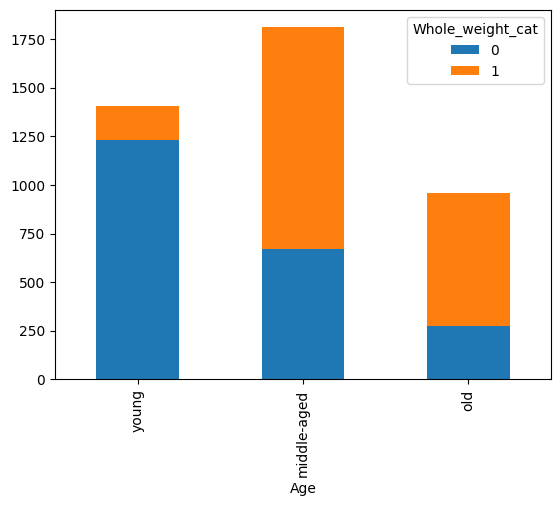

In [252]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack().plot(kind='bar',stacked=True);

In [253]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack()

<ipython-input-253-e78c3df56133>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack()


Whole_weight_cat,0,1
Age,,
young,1230,177
middle-aged,673,1137
old,275,685


In [254]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()

<ipython-input-254-7359b97f9dee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()


,0
Whole_weight_cat,
0,2178
1,1999


In [255]:
673/(1230+673+275)

0.30899908172635443

In [256]:
df.groupby(["Age","Whole_weight_cat"]).size().unstack() / df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()

<ipython-input-256-728aee36872c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack() / df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()
<ipython-input-256-728aee36872c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age","Whole_weight_cat"]).size().unstack() / df.groupby(["Age","Whole_weight_cat"]).size().unstack().sum()


Whole_weight_cat,0,1
Age,,
young,0.564738,0.088544
middle-aged,0.308999,0.568784
old,0.126263,0.342671


The first column shows the conditional probabilities we need:

𝑃(Young|Below average weight)  = 56.47%
𝑃(Middle-Aged|Below average weight)  = 30.89%
𝑃(Old|Below average weight)  = 12.62%

In [257]:
df.groupby(["Whole_weight_cat","Age"]).size().unstack() / df.groupby(["Whole_weight_cat","Age"]).size().unstack().sum()

<ipython-input-257-60d433535cd2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Whole_weight_cat","Age"]).size().unstack() / df.groupby(["Whole_weight_cat","Age"]).size().unstack().sum()
<ipython-input-257-60d433535cd2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Whole_weight_cat","Age"]).size().unstack() / df.groupby(["Whole_weight_cat","Age"]).size().unstack().sum()


Age,young,middle-aged,old
Whole_weight_cat,,,
0,0.8742,0.371823,0.286458
1,0.1258,0.628177,0.713542


<ipython-input-258-5587de86c47e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist( "Shucked_weight", by = "Age", bins = 20, edgecolor="white");


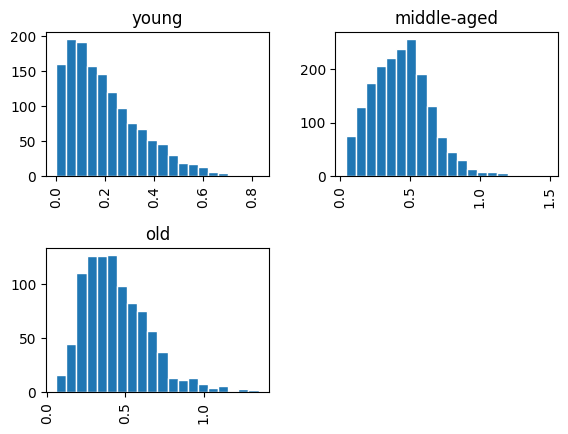

In [258]:
df.hist( "Shucked_weight", by = "Age", bins = 20, edgecolor="white");

In [259]:
df[ df["Shucked_weight"] == 0.5 ]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Whole_weight_cat
2525,M,0.59,0.455,0.16,1.090,0.5,0.2215,0.292,9,middle-aged,1
3701,M,0.66,0.510,0.18,1.261,0.5,0.2335,0.339,10,middle-aged,1


In [260]:
df.groupby("Age")["Shucked_weight"].mean()

<ipython-input-260-380a98a57962>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age")["Shucked_weight"].mean()


,Shucked_weight
Age,
young,0.198199
middle-aged,0.439923
old,0.443698


In [261]:
df.groupby("Age")["Shucked_weight"].std()

<ipython-input-261-74fa9d60c2ce>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age")["Shucked_weight"].std()


,Shucked_weight
Age,
young,0.147031
middle-aged,0.208437
old,0.208357


In [262]:
from scipy.stats import norm

In [263]:
Shucked_weight_likelihoods = norm.pdf( x=0.5123, loc=df.groupby("Age")["Shucked_weight"].mean(), scale = df.groupby("Age")["Shucked_weight"].std())
Shucked_weight_likelihoods

<ipython-input-263-34981b9213d5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Shucked_weight_likelihoods = norm.pdf( x=0.5123, loc=df.groupby("Age")["Shucked_weight"].mean(), scale = df.groupby("Age")["Shucked_weight"].std())


array([0.27701241, 1.80199698, 1.81368763])

In [264]:
priors*Shucked_weight_likelihoods

,proportion
Age,
middle-aged,0.120036
young,0.606993
old,0.416840


In [265]:
import seaborn as sns

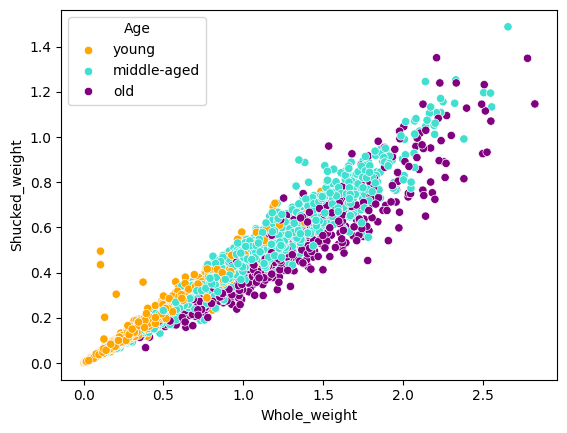

In [266]:
sns.scatterplot( x = "Whole_weight", y = "Shucked_weight", hue = "Age", data = df, palette = ["orange","turquoise","purple"]);

In [267]:
Weight_likelihoods = norm.pdf( x=1.1524, loc=df.groupby("Age")["Whole_weight"].mean(), scale = df.groupby("Age")["Whole_weight"].std())
Weight_likelihoods

<ipython-input-267-ea95419090bd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Weight_likelihoods = norm.pdf( x=1.1524, loc=df.groupby("Age")["Whole_weight"].mean(), scale = df.groupby("Age")["Whole_weight"].std())


array([0.08183726, 0.86622903, 0.87121394])

In [268]:
priors*Weight_likelihoods

,proportion
Age,
middle-aged,0.035462
young,0.291785
old,0.200231


In [269]:
priors*Shucked_weight_likelihoods*Weight_likelihoods

,proportion
Age,
middle-aged,0.009823
young,0.525795
old,0.363157


END RESULT IS THAT AN ABALONE WITH THE SHUCKED WEIGHT AND WHOLE WEIGHT OF .5123 and 1.1524 respectively is most likely middle-aged.